# Introduction 😃😃😃

## USA Real Estate - Predict price  

#### About Dataset

- This dataset contains Real Estate listings in the US broken by State and zip code.
- Data was collected via web scraping using python libraries.


### Columns

- status
- price
- bed
- bath
- acre_lot
- full_address
- street
- city
- state
- zip_code
- house_size
- sold_date

### Inspiration

- Can we predict housing prices based on this data?
- Which location contains the house with the highest prices?
- What ar the correlation between house prices and other attributes?
- What could be the trend behind housing prices?

# Work plan 🤝🤝🤝🤝🤝

- 1- Data Exploration & Analysis & Clean Data 🤝🤝🤝
- 2- Building a Machine Learning Model / classification score Volume


# Data Exploration & Analysis & Clean

In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import folium

import os


In [2]:
#Importing the dataset
df =pd.read_csv("../input/usa-real-estate-dataset/realtor-dataset-100k.csv")


# look the data set
df.head()

status   price  bed  bath  acre_lot  \
0  for_sale  105000  3.0   2.0      0.12   
1  for_sale   80000  4.0   2.0      0.08   
2  for_sale   67000  2.0   1.0      0.15   
3  for_sale  145000  4.0   2.0      0.10   
4  for_sale   65000  6.0   2.0      0.05   

                                        full_address  \
0  Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601   
1            Km 78 9 Carr # 135, Adjuntas, PR, 00601   
2            556G 556-G 16 St, Juana Diaz, PR, 00795   
3  R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...   
4                    14 Navarro, Mayaguez, PR, 00680   

                                          street        city        state  \
0                   Sector Yahuecas Titulo # V84    Adjuntas  Puerto Rico   
1                             Km 78 9 Carr # 135    Adjuntas  Puerto Rico   
2                               556G 556-G 16 St  Juana Diaz  Puerto Rico   
3  R5 Comunidad El Paraso Calle De Oro R-5 Ponce       Ponce  Puerto Rico   
4                                     14 Navarro    Mayaguez  Puerto Rico   

   zip_code  house_size sold_date  
0     601.0       920.0       NaN  
1     601.0      1527.0       NaN  
2     795.0       748.0       NaN  
3     731.0      1800.0       NaN  
4     680.0         NaN       NaN

In [3]:
# looking the shape DataSet
df.shape

(100000, 12)

In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        100000 non-null  object 
 1   price         100000 non-null  int64  
 2   bed           75050 non-null   float64
 3   bath          75112 non-null   float64
 4   acre_lot      85987 non-null   float64
 5   full_address  100000 non-null  object 
 6   street        99916 non-null   object 
 7   city          99948 non-null   object 
 8   state         100000 non-null  object 
 9   zip_code      99805 non-null   float64
 10  house_size    75082 non-null   float64
 11  sold_date     28745 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 9.2+ MB


- We need change Datatype column - Sold Date to datetime

In [5]:
# missing value

df.isnull().sum()

status              0
price               0
bed             24950
bath            24888
acre_lot        14013
full_address        0
street             84
city               52
state               0
zip_code          195
house_size      24918
sold_date       71255
dtype: int64

- We have a lot of missing value

In [6]:
# check if any duplicate value

df.duplicated().sum()

85140

- We have a lot of duplicate value around 85% - should drop this value

In [7]:
# drop duplicated value 

df.drop_duplicates(inplace=True)

In [8]:
# about na value after drop duplicated 

df.isnull().sum()

status             0
price              0
bed             3449
bath            3448
acre_lot        1943
full_address       0
street            62
city              16
state              0
zip_code          28
house_size      3442
sold_date       9564
dtype: int64

- Also , we have missing value in this column - bed, bath, house size - this columns have effect when make predict price , should be drop na 

In [9]:
# drop na

df.dropna(subset=["bed","bath","house_size"],inplace=True)

In [10]:
# about na value after drop na value in this  column - bed, bath, house size

df.isnull().sum()

status             0
price              0
bed                0
bath               0
acre_lot        1857
full_address       0
street            44
city               2
state              0
zip_code           9
house_size         0
sold_date       6242
dtype: int64

- About column -sold date a lot of missing , I don`t drop this and column acre_lot I don`t need in predict , should drop na in column city and zip code

In [11]:
# drop na

df.dropna(subset=["city","zip_code"],inplace=True)

In [12]:
df.isnull().sum()

status             0
price              0
bed                0
bath               0
acre_lot        1855
full_address       0
street            44
city               0
state              0
zip_code           0
house_size         0
sold_date       6232
dtype: int64

In [13]:
df.shape

(11204, 12)

- Now we have 11204 rows after clean data before that we had 100000, we loss around 90 % form dataset

In [14]:
#Conversion data type column - published date from object to Datetime

df["sold_date"]=pd.to_datetime(df["sold_date"])

In [15]:
# spilt special character in this columns - street and full address

df['full_address'] = df['full_address'].str.replace (r"""[^\w\s]+""","")
df['street'] = df['street'].str.replace (r"""[^\w\s]+""","")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [16]:
df.head()

status   price  bed  bath  acre_lot  \
0  for_sale  105000  3.0   2.0      0.12   
1  for_sale   80000  4.0   2.0      0.08   
2  for_sale   67000  2.0   1.0      0.15   
3  for_sale  145000  4.0   2.0      0.10   
5  for_sale  179000  4.0   3.0      0.46   

                                        full_address  \
0      Sector Yahuecas Titulo  V84 Adjuntas PR 00601   
1                Km 78 9 Carr  135 Adjuntas PR 00601   
2                556G 556G 16 St Juana Diaz PR 00795   
3  R5 Comunidad El Paraso Calle De Oro R5 Ponce P...   
5  Bo Calabazas San Sebastian San Sebastian PR 00612   

                                         street           city        state  \
0                   Sector Yahuecas Titulo  V84       Adjuntas  Puerto Rico   
1                             Km 78 9 Carr  135       Adjuntas  Puerto Rico   
2                               556G 556G 16 St     Juana Diaz  Puerto Rico   
3  R5 Comunidad El Paraso Calle De Oro R5 Ponce          Ponce  Puerto Rico   
5                    Bo Calabazas San Sebastian  San Sebastian  Puerto Rico   

   zip_code  house_size sold_date  
0     601.0       920.0       NaT  
1     601.0      1527.0       NaT  
2     795.0       748.0       NaT  
3     731.0      1800.0       NaT  
5     612.0      2520.0       NaT

In [17]:
# look  describe data set
df.describe().round(2)

price       bed      bath   acre_lot  zip_code  house_size
count     11204.00  11204.00  11204.00    9349.00  11204.00    11204.00
mean     561873.55      3.62      2.55      16.95   3517.37     2348.24
std     1183088.51      1.99      1.60    1042.38   2903.30    13800.66
min       10000.00      1.00      1.00       0.00    601.00      100.00
25%      224900.00      3.00      2.00       0.16   1145.50     1224.00
50%      340000.00      3.00      2.00       0.33   2864.00     1740.00
75%      549000.00      4.00      3.00       1.00   6066.00     2643.25
max    60000000.00     86.00     56.00  100000.00  95000.00  1450112.00

- Max price 6  M

In [18]:
df.sort_values(by="price",ascending=False).head()

status     price  bed  bath  acre_lot  \
40599  for_sale  60000000  9.0  10.0    400.00   
1145   for_sale  19950000  3.0   3.0       NaN   
1128   for_sale  19500000  5.0   7.0      0.30   
79949  for_sale  18899000  9.0   9.0     18.48   
28678  for_sale  18000000  7.0   6.0    321.43   

                               full_address                street  \
40599   450 Brickyard Rd Woodstock CT 06281      450 Brickyard Rd   
1145   200 Dorado Dr Unit 8 Dorado PR 00646  200 Dorado Dr Unit 8   
1128        51 Dorado Bch E Dorado PR 00646       51 Dorado Bch E   
79949          5 Concord Rd Weston MA 02493          5 Concord Rd   
28678   14 Sullivan Rd Sandisfield MA 01255        14 Sullivan Rd   

              city          state  zip_code  house_size  sold_date  
40599    Woodstock    Connecticut    6281.0     18777.0 2003-08-28  
1145        Dorado    Puerto Rico     646.0      4341.0        NaT  
1128        Dorado    Puerto Rico     646.0      5000.0        NaT  
79949       Weston  Massachusetts    2493.0     12589.0 2000-09-05  
28678  Sandisfield  Massachusetts    1255.0      3800.0        NaT

# Visualizations

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


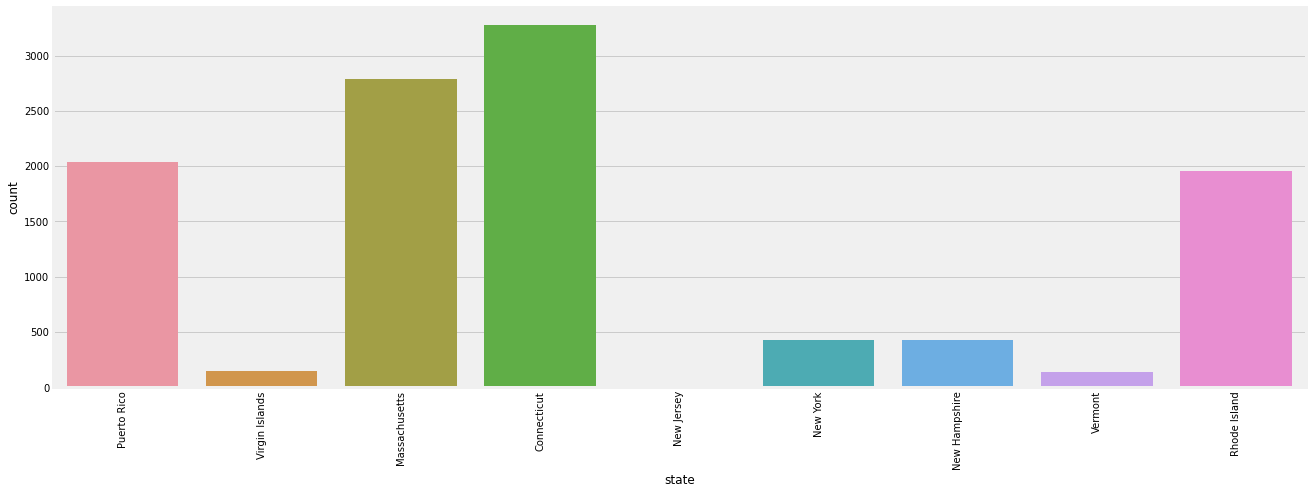

In [19]:
# how much repeat the state  in the dataset

plt.figure(figsize=(20,7))
sns.countplot(df['state'])
plt.xticks(rotation=90)
plt.show()

### The highest repeat State in US
- Connecticut       29 %
- Massachusetts     25 %
- Puerto Rico       18 %
- Rhode Island      17 %
- New York          3 %
- New Hampshire     3 %
- Virgin Islands    2 %
- Vermont           2 % 
- New Jersey        1 %

<AxesSubplot:xlabel='sold_date', ylabel='price'>

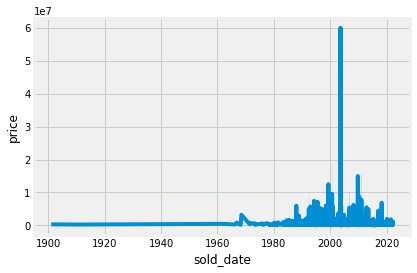

In [20]:
# change the price by the years

sns.lineplot(data=df , x="sold_date",y="price")

- We have one house the value price 6M , but the other house the price fluctuate 

Text(0.5, 1.0, 'The relation between number of baths and price')

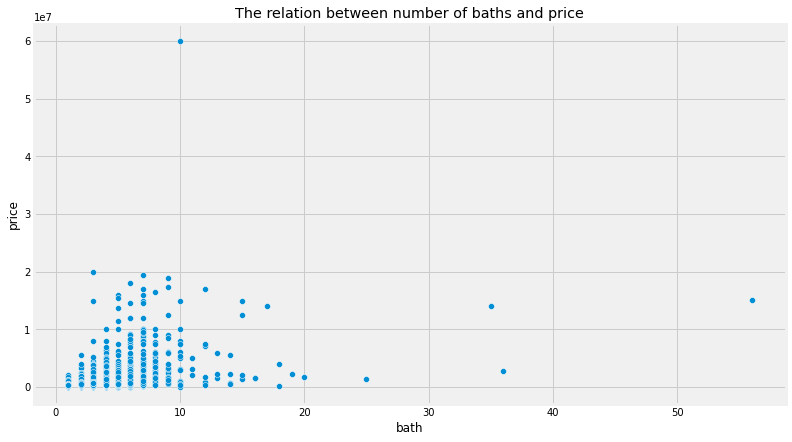

In [21]:
# show the relation between number of baths and price

plt.figure(figsize=(12,7))
sns.scatterplot(data=df,x="bath",y="price")
plt.title("The relation between number of baths and price")

- In general - When increasing number bathroom increasing the price , but we have some outlier

Text(0.5, 1.0, 'The relation between number of Beds and price')

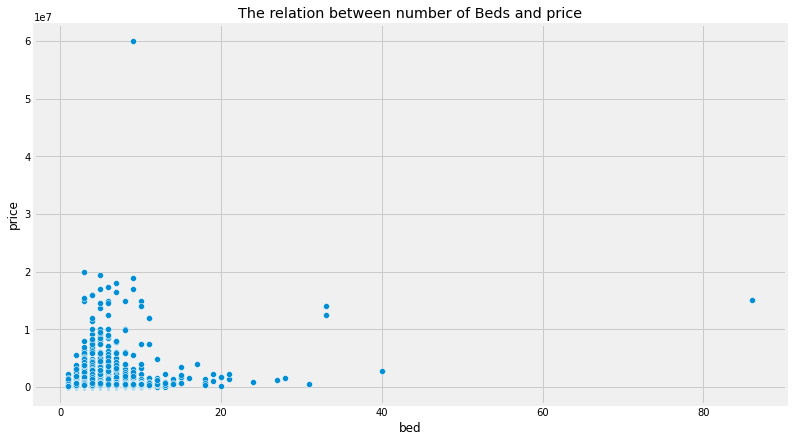

In [22]:
# show the relation between number of Beds and price

plt.figure(figsize=(12,7))

sns.scatterplot(data=df,x="bed",y="price")
plt.title("The relation between number of Beds and price")

- we have some outlier

Text(0.5, 1.0, 'The relation between House size and price')

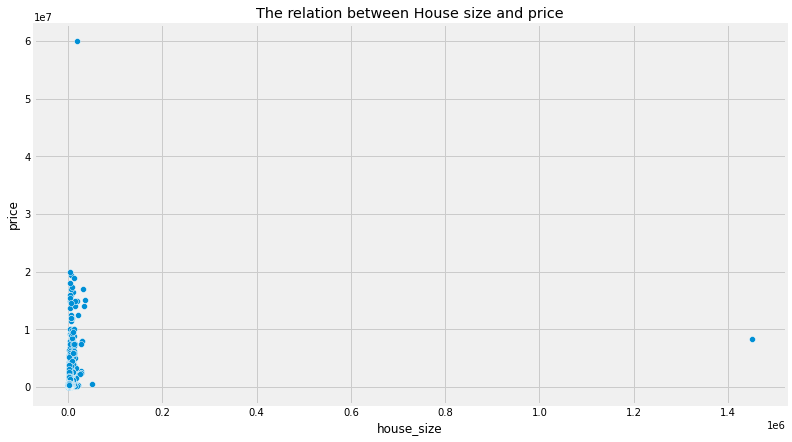

In [23]:
# show the relation between House size and price

plt.figure(figsize=(12,7))

sns.scatterplot(data=df,x="house_size",y="price")
plt.title("The relation between House size and price")

- also we have some value outlier

### Now I will drop any value outlier

In [24]:
data=df # create new dataframe for make drop

In [25]:
data.drop(40599,inplace=True)

In [26]:
data.sort_values(by="house_size",ascending=False).head(2)

status    price  bed  bath  acre_lot  \
10328  for_sale  8250000  5.0   6.0     33.29   
14172  for_sale   499000  4.0   2.0      1.25   

                                   full_address              street  \
10328                PR250 Int Culebra PR 00775           PR250 Int   
14172  162 Estate Carlton Frederiksted VI 00840  162 Estate Carlton   

               city           state  zip_code  house_size sold_date  
10328       Culebra     Puerto Rico     775.0   1450112.0       NaT  
14172  Frederiksted  Virgin Islands     840.0     49658.0       NaT

In [27]:
data.sort_values(by="bed",ascending=False).head(6)

status     price   bed  bath  acre_lot  \
80518  for_sale  15150000  86.0  56.0      1.32   
56861  for_sale   2850000  40.0  36.0      1.78   
54659  for_sale  12500000  33.0  15.0     89.00   
14343  for_sale  13995000  33.0  35.0      0.09   
81397  for_sale    450000  31.0  14.0      1.61   
25113  for_sale   1500000  28.0  16.0      0.13   

                                       full_address                    street  \
80518  7779 and 93 Arlington St Framingham MA 01702  7779 and 93 Arlington St   
56861               17 Church St Claverack NY 12565              17 Church St   
54659         310 Old Stockbridge Rd Lenox MA 01240    310 Old Stockbridge Rd   
14343        312 San Francisco St San Juan PR 00901      312 San Francisco St   
81397              35 Butler St Blackstone MA 01504              35 Butler St   
25113               393399 Main St Holyoke MA 01040            393399 Main St   

             city          state  zip_code  house_size  sold_date  
80518  Framingham  Massachusetts    1702.0     35666.0        NaT  
56861   Claverack       New York   12565.0     27443.0        NaT  
54659       Lenox  Massachusetts    1240.0     20821.0 1999-05-14  
14343    San Juan    Puerto Rico     901.0     15000.0        NaT  
81397  Blackstone  Massachusetts    1504.0     13000.0        NaT  
25113     Holyoke  Massachusetts    1040.0      9999.0        NaT

In [28]:
# drop any home have above 20 path
data.drop([80518,56861,14343,57128,54443],inplace=True)

In [29]:
#drop the high house size
data.drop(10328,inplace=True)

In [30]:
data.head()

status   price  bed  bath  acre_lot  \
0  for_sale  105000  3.0   2.0      0.12   
1  for_sale   80000  4.0   2.0      0.08   
2  for_sale   67000  2.0   1.0      0.15   
3  for_sale  145000  4.0   2.0      0.10   
5  for_sale  179000  4.0   3.0      0.46   

                                        full_address  \
0      Sector Yahuecas Titulo  V84 Adjuntas PR 00601   
1                Km 78 9 Carr  135 Adjuntas PR 00601   
2                556G 556G 16 St Juana Diaz PR 00795   
3  R5 Comunidad El Paraso Calle De Oro R5 Ponce P...   
5  Bo Calabazas San Sebastian San Sebastian PR 00612   

                                         street           city        state  \
0                   Sector Yahuecas Titulo  V84       Adjuntas  Puerto Rico   
1                             Km 78 9 Carr  135       Adjuntas  Puerto Rico   
2                               556G 556G 16 St     Juana Diaz  Puerto Rico   
3  R5 Comunidad El Paraso Calle De Oro R5 Ponce          Ponce  Puerto Rico   
5                    Bo Calabazas San Sebastian  San Sebastian  Puerto Rico   

   zip_code  house_size sold_date  
0     601.0       920.0       NaT  
1     601.0      1527.0       NaT  
2     795.0       748.0       NaT  
3     731.0      1800.0       NaT  
5     612.0      2520.0       NaT

# Visualization after drop some outlier value

<AxesSubplot:xlabel='sold_date', ylabel='price'>

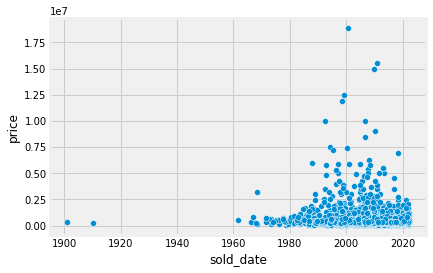

In [31]:
# change the price by the years

sns.scatterplot(data=data , x="sold_date",y="price")

Text(0.5, 1.0, 'The relation between number of baths and price')

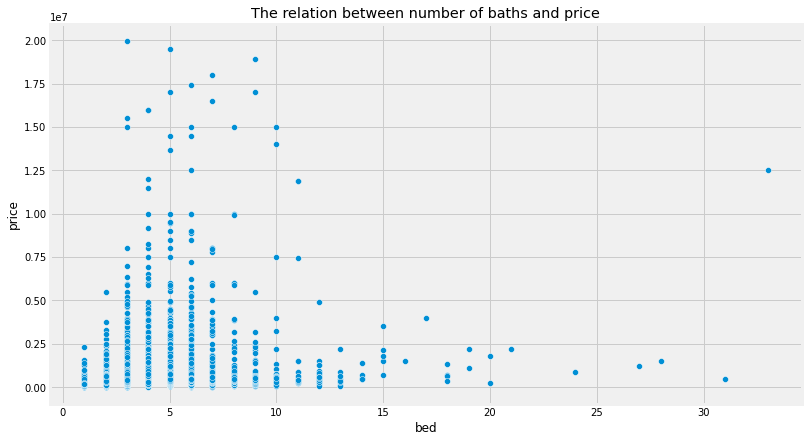

In [32]:
# show the relation between number of bed and price

plt.figure(figsize=(12,7))
sns.scatterplot(data=data,x="bed",y="price")
plt.title("The relation between number of baths and price")

Text(0.5, 1.0, 'The relation between number of baths and price')

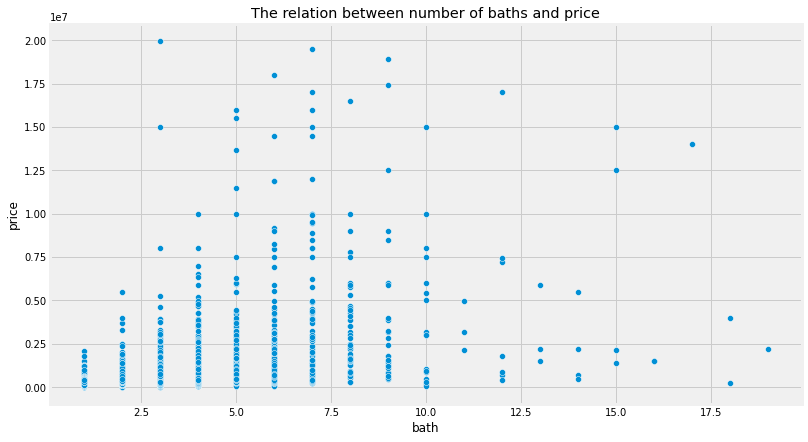

In [33]:
# show the relation between number of baths and price

plt.figure(figsize=(12,7))
sns.scatterplot(data=data,x="bath",y="price")
plt.title("The relation between number of baths and price")

Text(0.5, 1.0, 'The relation between House size and price')

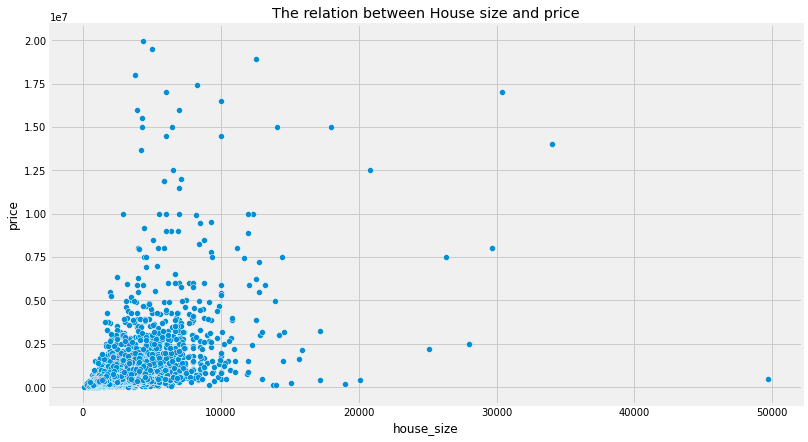

In [34]:
# show the relation between House size and price

plt.figure(figsize=(12,7))

sns.scatterplot(data=data,x="house_size",y="price")
plt.title("The relation between House size and price")

# Drow map the locations

## I need - latitude & longitude in USA , I will get the data from -  https://www.kaggle.com/datasets/qusaybtoush1990/usa-latitude-and-longitude -  based zip code

In [35]:
# file latitude & longitude in USA

lat=pd.read_csv("../input/usa-latitude-and-longitude/USA-latlon.csv")
lat.head()

zip_code  latitude   longitude 
0       601  18.180555  -66.749961
1       602  18.361945  -67.175597
2       603  18.455183  -67.119887
3       606  18.158345  -66.932911
4       610  18.295366  -67.125135

In [36]:
#merge tow data based zip code
new=pd.merge(data,lat,how="inner",left_on=["zip_code"],right_on=["zip_code"],suffixes=('_left', '_right'))
new.head()

status   price  bed  bath  acre_lot  \
0  for_sale  105000  3.0   2.0      0.12   
1  for_sale   80000  4.0   2.0      0.08   
2  for_sale   67000  2.0   1.0      0.15   
3  for_sale  150000  3.0   2.0      0.08   
4  for_sale   99000  3.0   1.0      0.15   

                                    full_address                       street  \
0  Sector Yahuecas Titulo  V84 Adjuntas PR 00601  Sector Yahuecas Titulo  V84   
1            Km 78 9 Carr  135 Adjuntas PR 00601            Km 78 9 Carr  135   
2            556G 556G 16 St Juana Diaz PR 00795              556G 556G 16 St   
3                 91 Del Rio Juana Diaz PR 00795                   91 Del Rio   
4               230 Calle  1 Juana Diaz PR 00795                 230 Calle  1   

         city        state  zip_code  house_size sold_date  latitude   \
0    Adjuntas  Puerto Rico     601.0       920.0       NaT  18.180555   
1    Adjuntas  Puerto Rico     601.0      1527.0       NaT  18.180555   
2  Juana Diaz  Puerto Rico     795.0       748.0       NaT  18.060494   
3  Juana Diaz  Puerto Rico     795.0      1045.0       NaT  18.060494   
4  Juana Diaz  Puerto Rico     795.0       800.0       NaT  18.060494   

   longitude   
0  -66.749961  
1  -66.749961  
2  -66.500624  
3  -66.500624  
4  -66.500624

In [37]:
new.rename(columns = {'latitude ':'latitude', 'longitude ':'longitude'}, inplace = True)

In [38]:
# Draw the Map

sanfran_map=folium.Map(location=[18.180555, -66.749961])

incidents = folium.map.FeatureGroup()

for lat, lng, in zip(new.latitude ,new.longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

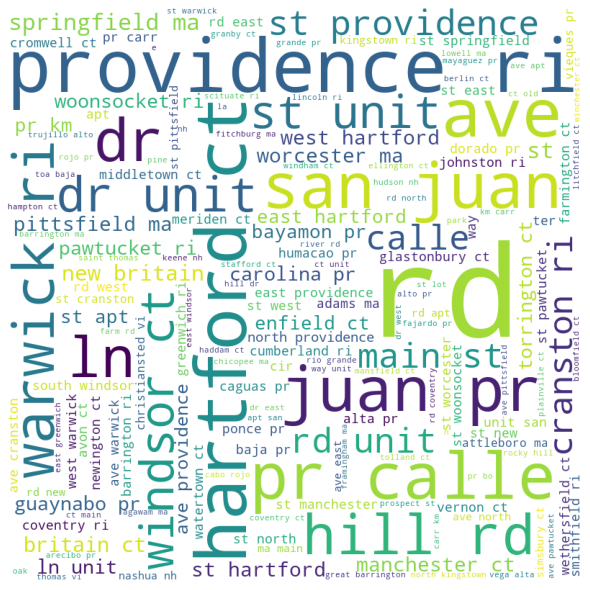

In [39]:
# repeat words Address

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in new.full_address:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

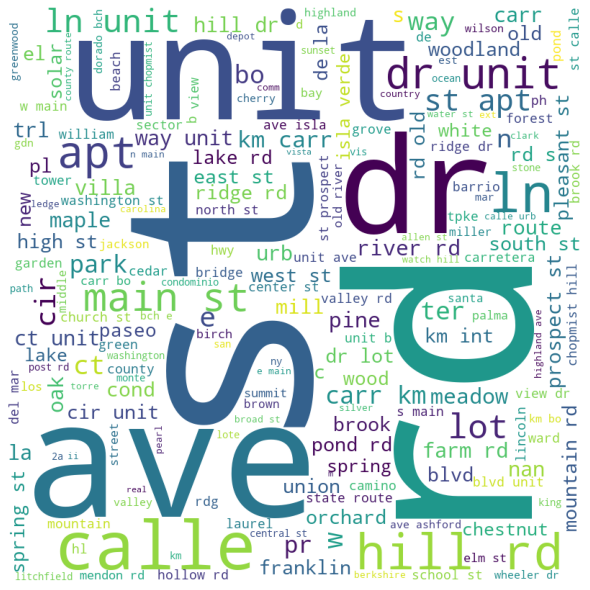

In [40]:
# repeat words street

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in new.street:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<AxesSubplot:xlabel='state'>

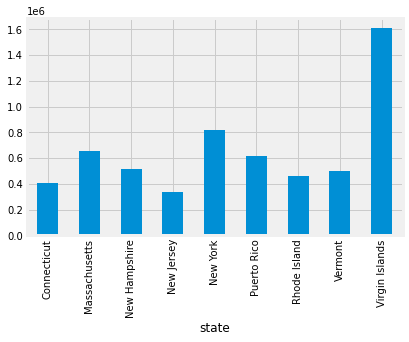

In [41]:
#Make group_by city

data.groupby("state")["price"].mean().round(2).plot(kind="bar")


- Virgin Islands --> 1,608,523 
- Vermont          --> 502,542 
- Rhode Island      --> 459,705 
- Puerto Rico        --> 617,260 
- New York         --> 815,180 
- New Jersey         --> 333,490 
- New Hampshire      --> 517,515 
- Massachusetts      --> 657,001 
- Connecticut       --> 405,277 


# Analysis Results😃😃😃

## USA Real Estate

### About Dataset

- This dataset contains Real Estate listings in the US broken by State and zip code.

#### Columns
- status - price - bed - bath - acre_lot - full_address - street - city - state - zip_code - house_size -sold_date


## First , We had 100K rows after drop duplicate and make clean data , become have around 11 K , I drop 90% from data , because a lot of duplicate and missing value.

## Second , I drop some outlier values.



### The highest repeat State in US

- Connecticut 29 %
- Massachusetts 25 %
- Puerto Rico 18 %
- Rhode Island 17 %
- New York 3 %
- New Hampshire 3 %
- Virgin Islands 2 %
- Vermont 2 %
- New Jersey 1 %


### We have one house the value price 6M ,= drop this house ,this house will be negative effect when make Predict price  

## In general - When increasing number bathroom or bedrooms or home size =  increasing the price


### Location the home have effect the price

### Avg price state

- Virgin Islands --> 1,608,523
- Vermont --> 502,542
- Rhode Island --> 459,705
- Puerto Rico --> 617,260
- New York --> 815,180
- New Jersey --> 333,490
- New Hampshire --> 517,515
- Massachusetts --> 657,001
- Connecticut --> 405,277



# 2- Building a Machine Learning Model - Regression 🙄🙄🙄

In [42]:
#Importing the basic librarires for building model


from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder,MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor

In [43]:
data.head()

status   price  bed  bath  acre_lot  \
0  for_sale  105000  3.0   2.0      0.12   
1  for_sale   80000  4.0   2.0      0.08   
2  for_sale   67000  2.0   1.0      0.15   
3  for_sale  145000  4.0   2.0      0.10   
5  for_sale  179000  4.0   3.0      0.46   

                                        full_address  \
0      Sector Yahuecas Titulo  V84 Adjuntas PR 00601   
1                Km 78 9 Carr  135 Adjuntas PR 00601   
2                556G 556G 16 St Juana Diaz PR 00795   
3  R5 Comunidad El Paraso Calle De Oro R5 Ponce P...   
5  Bo Calabazas San Sebastian San Sebastian PR 00612   

                                         street           city        state  \
0                   Sector Yahuecas Titulo  V84       Adjuntas  Puerto Rico   
1                             Km 78 9 Carr  135       Adjuntas  Puerto Rico   
2                               556G 556G 16 St     Juana Diaz  Puerto Rico   
3  R5 Comunidad El Paraso Calle De Oro R5 Ponce          Ponce  Puerto Rico   
5                    Bo Calabazas San Sebastian  San Sebastian  Puerto Rico   

   zip_code  house_size sold_date  
0     601.0       920.0       NaT  
1     601.0      1527.0       NaT  
2     795.0       748.0       NaT  
3     731.0      1800.0       NaT  
5     612.0      2520.0       NaT

#### For make predictions and based the analysis , the best columns [status, price, bed, bath ,city , state , zip_code ,house_size ]

In [44]:
# select the columns and new dataframe
new_df=data[["status","price","bed","bath","city","state","house_size"]]

In [45]:
new_df.head()

status   price  bed  bath           city        state  house_size
0  for_sale  105000  3.0   2.0       Adjuntas  Puerto Rico       920.0
1  for_sale   80000  4.0   2.0       Adjuntas  Puerto Rico      1527.0
2  for_sale   67000  2.0   1.0     Juana Diaz  Puerto Rico       748.0
3  for_sale  145000  4.0   2.0          Ponce  Puerto Rico      1800.0
5  for_sale  179000  4.0   3.0  San Sebastian  Puerto Rico      2520.0

In [46]:
new_df.isnull().sum()

status        0
price         0
bed           0
bath          0
city          0
state         0
house_size    0
dtype: int64

- no missing value

In [47]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11197 entries, 0 to 97288
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      11197 non-null  object 
 1   price       11197 non-null  int64  
 2   bed         11197 non-null  float64
 3   bath        11197 non-null  float64
 4   city        11197 non-null  object 
 5   state       11197 non-null  object 
 6   house_size  11197 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 699.8+ KB


In [48]:
# separation the data type columns [ object and numeric ]

cat = []
num = []
for i in new_df.columns:
    if new_df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

data_n=new_df[num]   # new dataframe just type numeric
data_c=new_df[cat]  # new dataframe just type object

In [49]:
col=data_c.columns
col

Index(['status', 'city', 'state'], dtype='object')

In [50]:
label_encoders = {}
categorical_columns = data_c.columns  # I would recommend using columns names here if you're using pandas. If you're using numpy then stick with range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_c[column] = label_encoders[column].fit_transform(data_c[column])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
 # merge 2 data set 
frames = [data_c, data_n]
  
data1 = pd.concat(frames,axis=1)
data1.head()

status  city  state   price  bed  bath  house_size
0       0     2      5  105000  3.0   2.0       920.0
1       0     2      5   80000  4.0   2.0      1527.0
2       0   213      5   67000  2.0   1.0       748.0
3       0   342      5  145000  4.0   2.0      1800.0
5       0   374      5  179000  4.0   3.0      2520.0

In [52]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11197 entries, 0 to 97288
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      11197 non-null  int64  
 1   city        11197 non-null  int64  
 2   state       11197 non-null  int64  
 3   price       11197 non-null  int64  
 4   bed         11197 non-null  float64
 5   bath        11197 non-null  float64
 6   house_size  11197 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 699.8 KB


In [53]:
data1.shape

(11197, 7)

In [54]:
#Defined X value and y value , and split the data train
X = data1.drop(columns="price")           
y = data1["price"]    # y = price

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (7837, 6)
X Test  :  (3360, 6)
Y Train :  (7837,)
Y Test  :  (3360,)


In [55]:
#Defined object from library Regression 

LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
XGB = XGBRegressor()

In [56]:
# make for loop for Regression 

li = [LR,DTR,RFR,KNR,KNR,XGB]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 29.95882262173741
DecisionTreeRegressor() : -0.8446729930370767
RandomForestRegressor() : 47.375728683107795
KNeighborsRegressor() : 13.783924823013882
KNeighborsRegressor() : 13.783924823013882
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) : 52.98957871101797


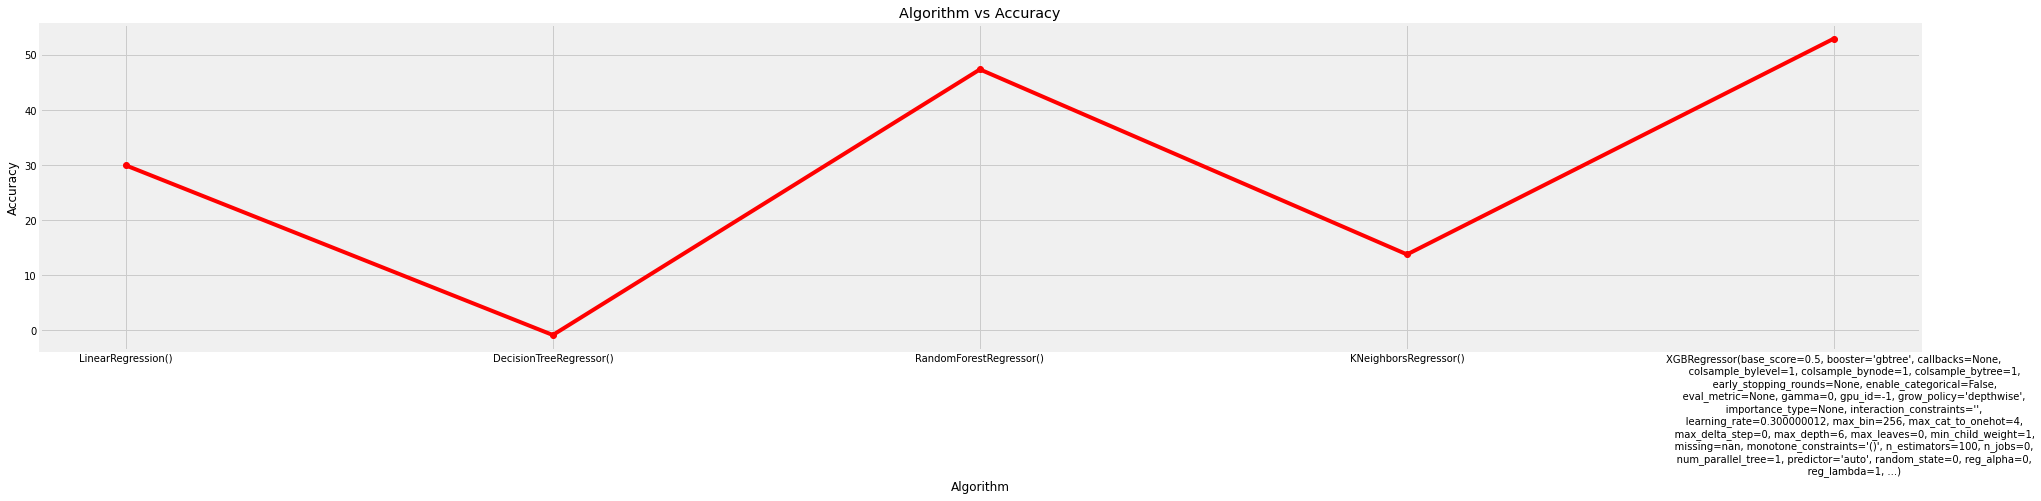

In [57]:
# make graph about Accuracy

plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.show()

# Model Selection Results 😃😃😃

## So , the best model XGB Regressor Model around 52.9%

# Not working , soon I will make updata 


# Notes 😃😃😃😃

- Thank for reading my analysis and my regression. 😃😃😃😃

- If you any questions or advice me please write in the comment . ❤️❤️❤️❤️

- If anyone has a model with a higher percentage, please tell me 🤝🤝🤝


# Vote ❤️😃

- If you liked my work upvote me ,


# The End 🤝🎉🤝🎉¶